In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Linear Regression Model: Predicting `PaymentTier` based on `ExperienceInCurrentDomain`

## Overview

This linear regression model is used to predict the `PaymentTier` of an employee based on their `ExperienceInCurrentDomain`. The model works by finding a linear relationship between the feature (experience) and the target (payment tier). The following steps detail how the model is built and trained.

### 1. **Data Loading and Feature Selection**
- **Feature (X):** The input feature is `ExperienceInCurrentDomain`, which represents the years of experience an employee has in their current field.
- **Target (y):** The target variable is `PaymentTier`, which represents the pay tier of an employee./'

### 2. **Adding the Intercept Term**
To account for the intercept term in the linear regression model, we add a column of ones to the feature matrix `X`. This ensures that the model has a bias term (intercept) \( \theta_0 \).

Mathematically, if the original dataset has \( m \) examples, each with one feature \( x_i \), the feature matrix \( X \) is augmented to include a column of ones:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_m
\end{bmatrix}
$$

The first column represents the intercept term, and the second column contains the actual `ExperienceInCurrentDomain` values.


In [27]:
# Load dataset
data = pd.read_csv('Employee2.csv')

# Selecting features and target (Use case: Predicting PaymentTier based on ExperienceInCurrentDomain)
X = data[['ExperienceInCurrentDomain']].values
y = data['PaymentTier'].values

# Adding a column of ones for the intercept term
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Initialize parameters (weights)
theta = np.zeros(X.shape[1])


### 3. **Initializing Parameters (Weights)**
We initialize the model parameters (weights), which are the coefficients that will be learned during training. These parameters include:
- \( \theta_0 \): The intercept term (bias).
- \( \theta_1 \): The coefficient for `ExperienceInCurrentDomain`.

Initially, all the parameters are set to zero:

$$
\theta = \begin{bmatrix} 0 \\ 0 \end{bmatrix}
$$

These parameters will be updated using gradient descent during the training process.

In [28]:
# Learning rate and number of iterations
alpha = 0.01
iterations = 1000

# Number of training examples
m = len(y)

### 4. **Hypothesis Function**
The hypothesis function defines the model's prediction. In linear regression, the hypothesis is a linear combination of the input features:

$$
h_\theta(x_i) = \theta_0 + \theta_1 x_i
$$

This represents the predicted `PaymentTier` based on an employee's `ExperienceInCurrentDomain`. The hypothesis function is applied to all training examples to generate predictions.


In [29]:
# Hypothesis function
def hypothesis(X, theta):
    return np.dot(X, theta)

### 5. **Cost Function**
The cost function quantifies how well the model's predictions match the actual target values. For linear regression, the cost function is the Mean Squared Error (MSE):

$$
J(\theta) = \frac{1}{2m} \sum_{i=1}^m \left( h_\theta(x_i) - y_i \right)^2
$$

Where:
- \( m \) is the number of training examples.
- \( h_\theta(x_i) \) is the predicted value for the \( i \)-th employee.
- \( y_i \) is the actual target value (the true `PaymentTier`).

The goal is to minimize the cost function, so that the model's predictions are as close as possible to the actual values.


In [30]:
# Cost function
def compute_cost(X, y, theta):
    errors = hypothesis(X, theta) - y
    cost = (1 / (2 * m)) * np.dot(errors.T, errors)
    return cost

### 6. **Gradient Descent**
Gradient descent is an optimization algorithm used to minimize the cost function by adjusting the model parameters. It iteratively updates the parameters in the direction that reduces the cost function.

The parameter update rule is as follows:

$$
\theta_j := \theta_j - \alpha \cdot \frac{1}{m} \sum_{i=1}^m \left( h_\theta(x_i) - y_i \right) \cdot x_{ij}
$$

Where:
- \( \alpha \) is the learning rate (a small positive value that controls the step size).
- \( \theta_j \) is the parameter being updated (for \( j = 0 \), it's the intercept term, and for \( j = 1 \), it's the coefficient for `ExperienceInCurrentDomain`).
- \( x_{ij} \) is the feature value for the \( i \)-th example and \( j \)-th feature.

The parameters are updated in each iteration of gradient descent until the cost function converges to a minimum.

### 7. **Training the Model**
Once the gradient descent algorithm has been run for a specified number of iterations, the model parameters \( \theta_0 \) and \( \theta_1 \) are learned. These parameters define the best-fitting line that predicts `PaymentTier` based on `ExperienceInCurrentDomain`.


In [31]:
# Gradient descent function
def gradient_descent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        errors = hypothesis(X, theta) - y
        gradient = (1 / m) * np.dot(X.T, errors)
        theta -= alpha * gradient
    return theta

# Training the model
theta = gradient_descent(X, y, theta, alpha, iterations)

### 8. **Making Predictions**
After the model is trained, it can be used to make predictions. For any new value of `ExperienceInCurrentDomain`, the model can predict the corresponding `PaymentTier` using the learned parameters:

$$
h_\theta(x_i) = \theta_0 + \theta_1 x_i
$$

Where:
- \( h_\theta(x_i) \) is the predicted `PaymentTier` for a given value of `ExperienceInCurrentDomain`.


In [32]:
# Predictions
predictions = hypothesis(X, theta)

In [33]:
# Output the model parameters
print("Learned parameters:", theta)
print("Final cost:", compute_cost(X, y, theta))

Learned parameters: [2.36889991 0.09112983]
Final cost: 0.1682758570363801


### 9. **Plotting the Results**
The final step is to visualize the relationship between `ExperienceInCurrentDomain` and `PaymentTier`. A scatter plot is used to display the actual data points, while the learned regression line is plotted to show the model's predictions.

The blue points represent the actual data, and the red line represents the model’s predicted values. This plot demonstrates how the model fits the data and predicts the payment tier based on experience.

## Conclusion
The linear regression model uses `ExperienceInCurrentDomain` to predict `PaymentTier`. It learns the optimal coefficients \( \theta_0 \) and \( \theta_1 \) through gradient descent, which minimizes the cost function and makes accurate predictions. The final model can then be used to predict payment tiers for employees based on their experience.

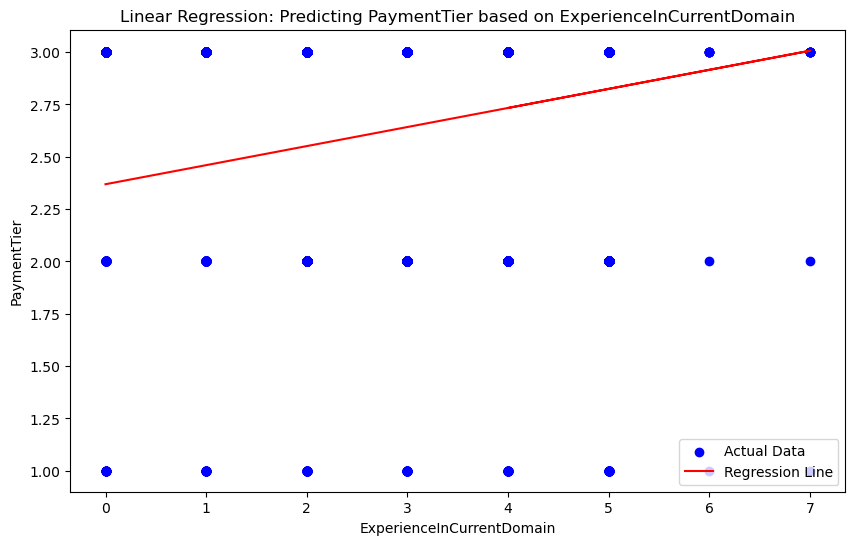

In [34]:
# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 1], y, color='blue', label='Actual Data')
plt.plot(X[:, 1], predictions, color='red', label='Regression Line')
plt.title('Linear Regression: Predicting PaymentTier based on ExperienceInCurrentDomain')
plt.xlabel('ExperienceInCurrentDomain')
plt.ylabel('PaymentTier')
plt.legend()
plt.show()